Вам подходит конвертируемый структурный продукт Reverse convertible с фиксированной купонной выплатой
None
Купон по структурному продукту 35.34 % за период в 2.0  лет


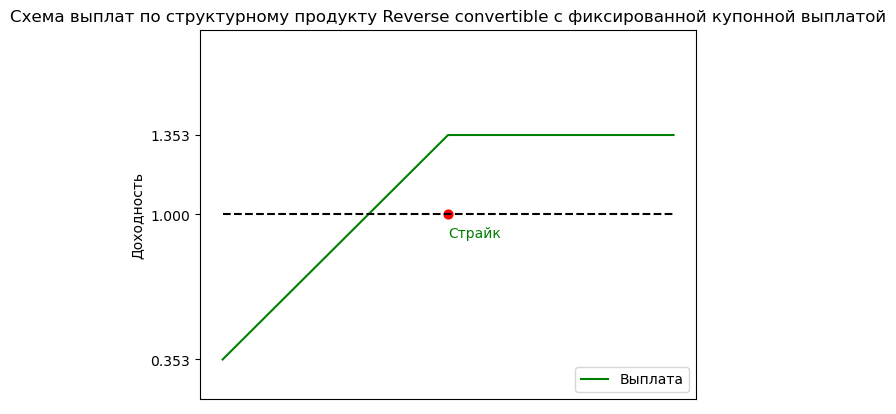

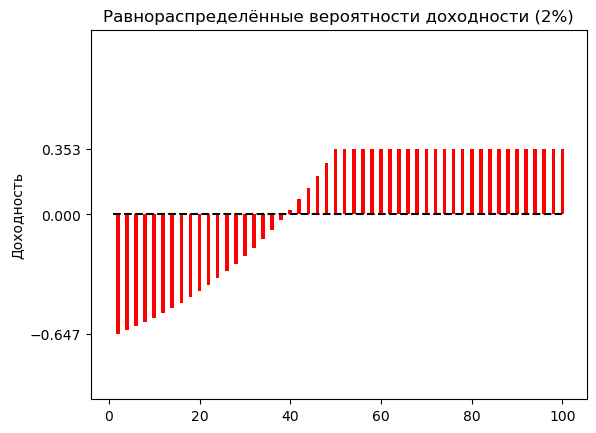

Структурный продукт данного типа относится к продуктам повышенной доходности. В него закладывается больший риск. Однако, купонная выплата по данному продукту выше, чем в продуктах с защитой капитала. В случае, если цена базового актива упадёт ниже заданного уровня, вам могут поставить базовый актив вместо инвестируемых средств, поэтому внимательно изучите на какой базовый актив приведён данный структурный продукт и определитесь с уровнем доверия к нему. В случае, если базовый актив по какой-то причине будет стоить 0, вам выплатят только купон, и вы рискуете потерять много денег. Потери могут составить  почти до 100% инвестируемых вами средств
None


In [4]:
#biblioteche
import tkinter as tk
from tkinter import *
from tkinter import ttk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import ImageTk, Image
from multiprocessing import Process
import math




def get_all():
    #parametrs
    q1 = var1.get()
    q2 = var2.get()
    q3 = var3.get()
    q4 = var4.get()
    rf = float(ent_rf.get())/100
    Vol = float(ent_vol.get())/100
    
    if q2 == 1:
        G = 1
    elif q2 == 0: 
        G = q3   
    T = q1 
    S = 1000
    e = 2.718
    I = 1000
    K = 0
    
# Black-Shouls Model cheat sheet:
# Call = S*N(d1)-X*e^-rT  * N(d2)
#d1 = ((ln(S|x)+(r+Vol^2|r))^T)|Vol*корT 
#d2 = d1- Vol*корT 
#Put = X*e^-rT * N(-d2) - SN(-d1)
#S -тек. цена базю актива.  
#N(x) - кумулятивная функция распределения нормального распределения
#X - цена исполнения опциона (страйк)
#rf - безрисковая ставка
#T - время до экспирации опциона 
#Vol - волатильность доходности базового актива


# a structured product without a fixed coupon but with capital protection   
    def capital_protected_UNCAP():
        
        #Description
        text = str(round(G*100)) + '%'
        text = print("Вам подходит структурный продукт с " + text + ' защитой капитала без фиксированной доходности')
        print(text)
        
        #Calculating 
        X = 1000*G
        d1 = (((math.log(S/X) + (rf+(Vol**2)/2)))**T)/(Vol*(T**0.5))
        d2 = d1 - (Vol*(T**0.5))
        Put = ((X*(e**((-rf)*T)))*(-d2))-(S*(-d1))
        Call = (S*d1) - ((X*(e**((-rf)*T)))*d2)
        Depozit = I*G/(1+rf)
        Q_options = (I*(1-K)-Depozit)/Call
        KY = (I-Depozit)/Call
        print("Коэффициент участия", KY*100)
        
        #Payment Plot
        t = [0, 1, 2]
        g = [G, G, 2]
        z = [1, 1, 1]
        plot = plt.plot(t, g, 'g-', t, z, 'k--')
        plt.ylim(G/2, 2)
        textic_protection = str(round(G*100)) + '%'
        plt.ylabel('Доходность')
        textic_title = 'Схема выплат по структурному продукту с защитой капитала '+ textic_protection + ' без фиксированной доходности'
        plt.title(textic_title)
        plt.xticks([])
        plt.yticks([G, 1])
        plt.legend(['Выплата'], loc = 4)
        plt.show()
        plt.close()
        
        #Plot of probability distribution of return (2%) for Capital protected without Cap
        q1 = 1-G
        q25 = 0.8
        X_24 = q25/q1
        mn = X_24** (1./24)
        length = 25
        distribution_2 = [((1-G) * mn ** (n - 1)) for n in range(1, length+1)]
        distribution_1 = [-(1-G) for n in range(1, 16)] 
        distribution_3 = np.arange((G-1), (1-G), ((1-G)-(G-1))/10)
        distribution_3 = distribution_3.tolist()
        x1 = np.arange(2, 102, 2)
        Z = distribution_1+distribution_3+distribution_2
        fig, ax = plt.subplots()
        ax.bar(x1, Z, color = 'red')
        ax.set_title('Равнораспределённые вероятности доходности (2%)')
        plt.ylabel('Доходность')
        plt.ylim(G**2-1.1)
        line1 = [1,100]
        line11 = [0, 0]
        plt.plot(line1,line11, 'k--')
        plt.yticks([G-1, 0])
        plt.show()
        plt.close()
        
        print('Структурный продукт данного типа относится к слабо-рисковому типу структурных продуктов.  Вы будете участвовать в росте базового актива с учётом коэффициента участия, при этом ваш потенциальный доход не ограничен. Например, коэффициент участия 25%, а актив вырос на 100 пунктов, 25 пунктов (100*0.25) – являются вашей прибылью по данному продукту. Также, продукт обеспечивает защиту вашего капитала на заданном уровне. Вы можете потерять средства и получить только гарантированную сумму в случае, когда базовый актив упадёт ниже определённого уровня.')
        
        
# a structured product with a fixed coupon and capital protection
    def capital_protected_CAP():
        
        #Description
        text = str(round(G*100)) + '%'
        text = print("Вам подходит структурный продукт с " + text + ' защитой капитала c фиксированной купонной выплатой')
        print(text)
        
        #Calculating 
        X = 1000*G
        d1 = (((math.log(S/X) + (rf+(Vol**2)/2)))**T)/(Vol*(T**0.5))
        d2 = d1 - (Vol*(T**0.5))
        Put = ((X*(e**((-rf)*T)))*(-d2))-(S*(-d1))
        Call = (S*d1) - ((X*(e**((-rf)*T)))*d2)
        Depozit = I*G/(1+rf)
        Q_options = (I*(1-K)-Depozit)/Call
        KY = (I-Depozit)/Call
        reward = round(((Call*KY+I)/I)-1, 3)
        coupon = round(reward+rf, 3)
        
        print("Коэффициент участия", round(KY*100, 2))
        print("Купон по структурному продукту", round(coupon*100, 2), '%')
        
        #Payment Plot
        t = [0, 1, 1.5, 2, 2.5]
        g = [G, G, (1+coupon), (1+coupon), (1+coupon)]
        z = [1, 1, 1, 1, 1]
        plot = plt.plot(t, g, 'g-', t, z, 'k--')
        plt.ylim(G/2, 2)
        textic_protection = str(round(G*100)) + '%'
        plt.ylabel('Доходность')
        textic_title = 'Схема выплат по структурному продукту с защитой капитала '+ textic_protection + ' с фиксированным купоном'
        plt.title(textic_title)
        plt.xticks([])
        plt.yticks([G, 1, (1+coupon)])
        plt.legend(['Выплата'], loc = 4)
        plt.show()
        plt.close()
        
        #Plot of probability distribution of return (2%) for Capital Protected with Cap
        distribution_1 = [-(1-G) for n in range(1, 21)] 
        distribution_2 = np.arange((G-1), coupon, (coupon-(G-1))/10)
        distribution_2 = distribution_2.tolist()
        distribution_3 = [coupon for n in range(1, 21)] 
        x1 = np.arange(2, 102, 2)
        Z = distribution_1+distribution_2+distribution_3
        fig, ax = plt.subplots()
        ax.bar(x1, Z, color = 'red')
        plt.ylim(G-1.1, 0.5+coupon)
        ax.set_title('Равнораспределённые вероятности доходности (2%)')
        plt.ylabel('Доходность')
        line1 = [1,100]
        line11 = [0, 0]
        plt.plot(line1,line11, 'k--')
        plt.yticks([G-1,0, coupon])
        plt.show()
        plt.close()
        
        print('Структурный продукт данного типа относится к слабо-рисковому типу структурных продуктов. Вы будете участвовать в росте базового актива с учётом коэффициента участия, но при этом ваш потенциальный доход ограничен фиксированной купонной выплатой. Также, продукт обеспечивает защиту вашего капитала на заданном уровне. Вы можете потерять средства и получить только гарантированную сумму в случае, когда базовый актив упадёт ниже определённого уровня.')
        
 # a Reverse convertible product with a fixed coupon and capital protection       
    def reverse_convertible():
        
        #Description
        text = print('Вам подходит конвертируемый структурный продукт Reverse convertible с фиксированной купонной выплатой')
        print(text)
        
        #Calculating   
        X = 1000
        d1 = (((math.log(S/X) + (rf+(Vol**2)/2)))**T)/(Vol*(T**0.5))
        d2 = d1 - (Vol*(T**0.5))
        Put = ((X*(e**((-rf)*T)))*d1)-(S*d2)
        #cap = Put+rf
        cap = Put/S + rf
        print("Купон по структурному продукту", round(cap*100, 2), '% за период в', T , ' лет')
        
        #Payment Plot
        t = [0, 1, 2]
        g = [cap, 1+cap, 1+cap]
        z = [1, 1, 1]
        plot = plt.plot(t, g, 'g-', t, z, 'k--')
        plt.ylim(cap/2, 1+(1-cap/2))
        plt.ylabel('Доходность')
        textic_title = 'Схема выплат по структурному продукту Reverse convertible c фиксированной купонной выплатой'
        plt.title(textic_title)
        plt.xticks([])
        plt.yticks([cap, 1, 1+cap])
        plt.legend(['Выплата'], loc = 4)
        plt.scatter(1, 1, color='red', s=40, marker='o')
        plt.text(1, 0.9, 'Страйк', color = 'Green')
        plt.show()
        plt.close()
                     
        #Plot of probability distribution of return (2%) for Reverse convertible
        q1 = cap
        q25 = 1+cap
        X_24 = q25/q1
        mn = X_24** (1./24)
        length = 25
        distribution_1 = [(cap * mn ** (n - 1))-1 for n in range(1, length+1)]
        distribution_2 = [cap for n in range(1, length+1)] 
        x1 = np.arange(2, 102, 2)
        Z = distribution_1+distribution_2
        fig, ax = plt.subplots()
        ax.bar(x1, Z, color = 'red')
        plt.ylim(-1, 1)
        ax.set_title('Равнораспределённые вероятности доходности (2%)')
        plt.ylabel('Доходность')
        line1 = [1,100]
        line11 = [0, 0]
        plt.plot(line1,line11, 'k--')
        plt.yticks([cap, 0, distribution_1[0] ])
        plt.show()
        plt.close()
        
        print('Структурный продукт данного типа относится к продуктам повышенной доходности. В него закладывается больший риск. Однако, купонная выплата по данному продукту выше, чем в продуктах с защитой капитала. В случае, если цена базового актива упадёт ниже заданного уровня, вам могут поставить базовый актив вместо инвестируемых средств, поэтому внимательно изучите на какой базовый актив приведён данный структурный продукт и определитесь с уровнем доверия к нему. В случае, если базовый актив по какой-то причине будет стоить 0, вам выплатят только купон, и вы рискуете потерять много денег. Потери могут составить  почти до 100% инвестируемых вами средств')
                     
                     
    #choice
    if q2 == 1 and q4 == 1:
        print(capital_protected_CAP())
    elif q2 ==1 and q4 == 0: 
        print(capital_protected_UNCAP())
    elif q2 == 0 and q3 < 1 and q4 == 1: 
        print(capital_protected_CAP())
    elif q2 == 0 and q3 < 1 and q4 == 0:
        print(capital_protected_UNCAP())
    elif q2 == 0 and q3 == 1 and q4 == 1:
        print(reverse_convertible())
    elif q2 == 0 and q3 == 1 and q4 == 0:
        print('В соответствии с Вашими предпочтениями, Вам рекомендуется участвовать в росте базового актива напрямую. Вам следует приобрести сразу базовый актив')
    
    
    
    window.destroy()


#Input of initial data and questionnaires
window = tk.Tk()
window.title("Анкета риск-профиля клиента")
scrollbar = tk.Scrollbar(window)
scrollbar.pack(side="right", fill="y")

lbl_ask = tk.Label(text= 'Введите указанные ниже значения (десятичные разделяются .)')
lbl_ask.pack()
frm_form = tk.Frame(relief=tk.SUNKEN, borderwidth=3)
frm_form.pack()
#Entry rf
lbl_rf = tk.Label(master=frm_form, text="Безрисковая процентная ставка")
ent_rf = tk.Entry(master=frm_form, width=50)
lbl_rf.grid(row=0, column=0, sticky="e")
ent_rf.grid(row=0, column=1)
#Entry Vol
lbl_vol = tk.Label(master=frm_form, text="Волатильность базового актива")
ent_vol = tk.Entry(master=frm_form, width=50)
lbl_vol.grid(row=1, column=0, sticky="e")
ent_vol.grid(row=1, column=1)


#questionnaires form
lbl_form = tk.Label(text= 'Заполните анкету. На основе Ваших ответов Вам будет предложен структурный продукт')
lbl_form.pack()

q_form = tk.Frame()
q_form.pack()

var1=tk.DoubleVar()
var1.set(1)
#first question
lbl_q1 = tk.Label(master = q_form, text='На какой срок вы готовы инвестировать Ваши денежные средства?')
lbl_q1.grid(row=0, column = 2)
rad01 = tk.Radiobutton(master=q_form, text="1 год", variable=var1, value=1)
rad11 = tk.Radiobutton(master=q_form, text="2 года", variable=var1, value=2)
rad21 = tk.Radiobutton(master=q_form, text="3 года", variable=var1, value=3)
rad31 = tk.Radiobutton(master=q_form, text="4 года", variable=var1, value=4)
rad41 = tk.Radiobutton(master=q_form, text="5 и более лет", variable=var1, value=5)
rad01.grid(row=1, column=0)
rad11.grid(row=1, column=1)
rad21.grid(row=1, column=2)
rad31.grid(row=1, column=3)
rad41.grid(row=1, column=4)

var2=tk.DoubleVar()
var2.set(0)
#2 question
lbl_q2 = tk.Label(master = q_form, text='Готовы ли Вы потерять часть ваших денег?')
lbl_q2.grid(row=2, column = 2)
rad02 = tk.Radiobutton(master=q_form, text="Да, готов", variable=var2, value=0)
rad12 = tk.Radiobutton(master=q_form, text="Нет, не готов", variable=var2, value=1)
rad02.grid(row=3, column=1)
rad12.grid(row=3, column=3)

var3=tk.DoubleVar()
var3.set(1)
#3 question
lbl_q3 = tk.Label(master = q_form, text='Если готовы, то какой размер потерь за 1 год Вы готовы себе позволить?')
lbl_q3.grid(row=4, column = 2)
rad03 = tk.Radiobutton(master=q_form, text="5%", variable=var3, value=0.95)
rad13 = tk.Radiobutton(master=q_form, text="10%", variable=var3, value=0.9)
rad23 = tk.Radiobutton(master=q_form, text="15%", variable=var3, value=0.85)
rad33 = tk.Radiobutton(master=q_form, text="20%", variable=var3, value=0.8)
rad43 = tk.Radiobutton(master=q_form, text="Более 20%", variable=var3, value=1)
rad03.grid(row=5, column=0)
rad13.grid(row=5, column=1)
rad23.grid(row=5, column=2)
rad33.grid(row=5, column=3)
rad43.grid(row=5, column=4)

var4=tk.DoubleVar()
var4.set(1)
#4 question
lbl_q4 = tk.Label(master = q_form, text='Готовы ли Вы ограничить доходность, но при этом получить дополнительную премию в виде компенсации?')
lbl_q4.grid(row=6, column = 2)
rad04 = tk.Radiobutton(master=q_form, text="Да, готов", variable=var4, value=1)
rad14 = tk.Radiobutton(master=q_form, text="Нет, не готов", variable=var4, value=0)
rad04.grid(row=7, column=1)
rad14.grid(row=7, column=3)


#Button form 
frm_buttons = tk.Frame()
frm_buttons.pack(fill=tk.X, ipadx=5, ipady=5)
btn_submit = tk.Button(master=frm_buttons, text="Отправить", command = get_all)
btn_submit.pack(side=tk.RIGHT, padx=10, ipadx=10)

window.mainloop()
